In [101]:
# coding: utf-8
import pandas as pd
import matplotlib.pyplot as plt

In [102]:
# 加载空气质量数据
air_quality = pd.read_csv("data/air_quality_no2_long.csv")
air_quality.head()

,city,country,date.utc,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³


In [124]:
air_quality.dtypes

city                      object
country                   object
datetime     datetime64[ns, UTC]
location                  object
parameter                 object
value                    float64
unit                      object
month                      int64
dtype: object

In [103]:
# 列名更改为datetime
air_quality = air_quality.rename(columns={"date.utc": "datetime"})
air_quality.head()

,city,country,datetime,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³


In [104]:
air_quality.city.unique()

array(['Paris', 'Antwerpen', 'London'], dtype=object)

#### 空气质量数据

In [105]:
# 我想将列中的日期作为日期对象而不是纯文本datetime
air_quality["datetime"] = pd.to_datetime(air_quality["datetime"])
air_quality["datetime"]

0      2019-06-21 00:00:00+00:00
1      2019-06-20 23:00:00+00:00
2      2019-06-20 22:00:00+00:00
3      2019-06-20 21:00:00+00:00
4      2019-06-20 20:00:00+00:00
                  ...           
2063   2019-05-07 06:00:00+00:00
2064   2019-05-07 04:00:00+00:00
2065   2019-05-07 03:00:00+00:00
2066   2019-05-07 02:00:00+00:00
2067   2019-05-07 01:00:00+00:00
Name: datetime, Length: 2068, dtype: datetime64[ns, UTC]

In [106]:
# 最初，其中的值是字符串，不提供任何datetime操作(例如，提取年份、星期几……)。
# 通过应用该函数，pandas解释字符串并将其转换为datetime(即)对象。在pandas中，
# 我们将这些datetime对象称为panda . timestamp，类似于标准库中的对象。
# datetimeto_datetimedatetime64 datetime.datetime (ns, UTC)
air_quality.head(1)

,city,country,datetime,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³


In [107]:
# 尽可能多的数据集包含在一个datetime信息列,熊猫输入函数像pandas.read_csv()
# 和可以转换日期在读取数据时使用的参数列表的列读取时间戳:
# pandas.read_json parse_dates ("读取文件列名")
pd.read_csv(filepath_or_buffer="./data/air_quality_no2_long.csv",
            parse_dates=["date.utc"])

,city,country,date.utc,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³
...,...,...,...,...,...,...,...
2063,London,GB,2019-05-07 06:00:00+00:00,London Westminster,no2,26.0,µg/m³
2064,London,GB,2019-05-07 04:00:00+00:00,London Westminster,no2,16.0,µg/m³
2065,London,GB,2019-05-07 03:00:00+00:00,London Westminster,no2,19.0,µg/m³
2066,London,GB,2019-05-07 02:00:00+00:00,London Westminster,no2,19.0,µg/m³


In [108]:
# 为什么这些熊猫。时间戳对象有用吗?让我们用一些示例案例来说明附加价值。
# 我们正在处理的时间序列数据集的开始和结束日期是什么?
air_quality["datetime"].min(), air_quality["datetime"].max()

(Timestamp('2019-05-07 01:00:00+0000', tz='UTC'),
 Timestamp('2019-06-21 00:00:00+0000', tz='UTC'))

In [109]:
# 使用熊猫。用于datetimes的时间戳使我们能够使用日期信息进行计算，并使它们具有可比性。
# 因此，我们可以使用它来得到时间序列的长度:
air_quality["datetime"].max() - air_quality["datetime"].min()


Timedelta('44 days 23:00:00')

In [110]:
# 结果是一只熊猫。对象，类似于标准Python库中的对象，并定义了一个持续时间
print(air_quality.head())

    city country                  datetime location parameter  value   unit
0  Paris      FR 2019-06-21 00:00:00+00:00  FR04014       no2   20.0  µg/m³
1  Paris      FR 2019-06-20 23:00:00+00:00  FR04014       no2   21.8  µg/m³
2  Paris      FR 2019-06-20 22:00:00+00:00  FR04014       no2   26.5  µg/m³
3  Paris      FR 2019-06-20 21:00:00+00:00  FR04014       no2   24.9  µg/m³
4  Paris      FR 2019-06-20 20:00:00+00:00  FR04014       no2   21.4  µg/m³


#### 我想在仅包含测量月份的列中添加一个新列DataFrame

In [111]:
# 我想在仅包含测量月份的列中添加一个新列DataFrame
air_quality["month"] = air_quality["datetime"].dt.month
air_quality.head()

,city,country,datetime,location,parameter,value,unit,month
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³,6
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³,6
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³,6
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³,6
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³,6


#### 每个测量地点每周每一天的平均浓度是什么？


In [112]:
# 每个测量地点每周每一天的平均浓度是什么？
air_quality.groupby(
    [air_quality["datetime"].dt.weekday, "location"]
)["value"].mean()

datetime  location          
0         BETR801               27.875000
          FR04014               24.856250
          London Westminster    23.969697
1         BETR801               22.214286
          FR04014               30.999359
          London Westminster    24.885714
2         BETR801               21.125000
          FR04014               29.165753
          London Westminster    23.460432
3         BETR801               27.500000
          FR04014               28.600690
          London Westminster    24.780142
4         BETR801               28.400000
          FR04014               31.617986
          London Westminster    26.446809
5         BETR801               33.500000
          FR04014               25.266154
          London Westminster    24.977612
6         BETR801               21.896552
          FR04014               23.274306
          London Westminster    24.859155
Name: value, dtype: float64

<AxesSubplot:xlabel='datetime'>

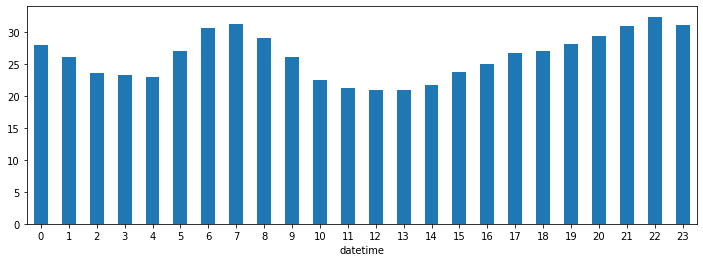

In [113]:
# 将所有站的时间系列中的典型模式绘制在一起。
# 换句话说，一天中每小时的平均值是怎样的？
fig, axs = plt.subplots(figsize=(12, 4))
air_quality.groupby(
    air_quality["datetime"].dt.hour
)["value"].mean().plot(kind='bar', rot=0, ax=axs)

Text(0, 0.5, '$NO_2 (µg/m^3)')

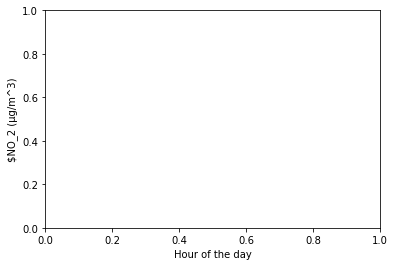

In [114]:
plt.xlabel("Hour of the day")
plt.ylabel("$NO_2 (µg/m^3)")

#### 日期时间作为索引


In [115]:
# 在关于重塑的教程中，引入枢轴（）来重塑数据表，每个测量位置作为一个单独的列：
no_2 = air_quality.pivot(index="datetime",
                         columns="location",
                         values="value")
no_2.head()

location,BETR801,FR04014,London Westminster
datetime,,,
2019-05-07 01:00:00+00:00,50.5,25.0,23.0
2019-05-07 02:00:00+00:00,45.0,27.7,19.0
2019-05-07 03:00:00+00:00,NaN,50.4,19.0
2019-05-07 04:00:00+00:00,NaN,61.9,16.0
2019-05-07 05:00:00+00:00,NaN,72.4,NaN


In [116]:
# 过旋转数据，日期时间信息成为表的索引。一般来说，将列设置为索引可以通过该函数实现。set_index
# 与日期时间索引（即）配合用，可提供强大的功能。例如，我们不需要访问者来获取时间系列属性，但直接在索引上提供以下属性：DatetimeIndexdt
no_2.index.year, no_2.index.weekday

(Int64Index([2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019,
             ...
             2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019],
            dtype='int64', name='datetime', length=1033),
 Int64Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
             ...
             3, 3, 3, 3, 3, 3, 3, 3, 3, 4],
            dtype='int64', name='datetime', length=1033))

In [117]:
# 其他一些优点是方便的时间段子集或地块上的调整时间尺度。让我们将此应用到我们的数据中。

#### 从 5 月 20 日到 5 月 21 日结束，在不同的车站创建值图 NO2

<AxesSubplot:xlabel='datetime'>

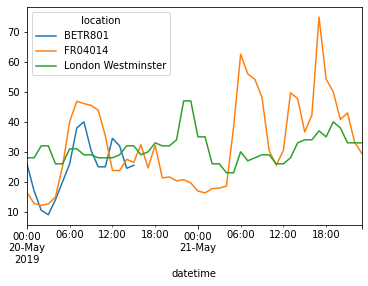

In [118]:
no_2["2019-05-20": "2019-05-21"].plot()

#### 将时间序列重新采样到另一个频率

In [119]:
# 将当前每小时时间序列的值合计为每个站点的月最大值。
monthly_max = no_2.resample("M").max()
monthly_max

location,BETR801,FR04014,London Westminster
datetime,,,
2019-05-31 00:00:00+00:00,74.5,97.0,97.0
2019-06-30 00:00:00+00:00,52.5,84.7,52.0


In [120]:
"""
使用日期时间索引的时间串联数据的一个非常强大的方法是能够将时间串联重新调到另一个频率（例如，将次要数据转换为 5 分钟数据）。

重合（）方法类似于组比操作：

它通过使用定义目标频率的字符串（例如,...）提供基于时间的分组M5H

它需要一个聚合函数，如，,...meanmax
"""

'\n使用日期时间索引的时间串联数据的一个非常强大的方法是能够将时间串联重新调到另一个频率（例如，将次要数据转换为 5 分钟数据）。\n\n重合（）方法类似于组比操作：\n\n它通过使用定义目标频率的字符串（例如,...）提供基于时间的分组M5H\n\n它需要一个聚合函数，如，,...meanmax\n'

In [121]:
# 定义时，时间系列的频率由属性提供：freq
monthly_max.index.freq

<MonthEnd>

#### 绘制每个站的每日平均值图 NO2


<AxesSubplot:xlabel='datetime'>

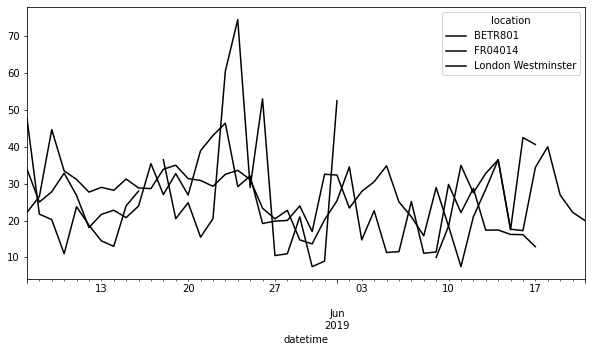

In [122]:
no_2.resample("D").mean()\
    .plot(style="-0", figsize=(10, 5))

In [123]:
"""
有关时间系列功率的更多详细信息，请在用户指南部分提供。resampling

记得

有效的日期字符串可以使用函数转换为日期时间对象，或作为读取函数的一部分。to_datetime

熊猫中的日期对象支持使用访问器进行计算、逻辑操作和方便的日期相关属性。dt

A 包含这些与日期相关的属性，并支持方便的切片。DatetimeIndex

Resample是改变时间系列频率的有力方法。
"""

'\n有关时间系列功率的更多详细信息，请在用户指南部分提供。resampling\n\n记得\n\n有效的日期字符串可以使用函数转换为日期时间对象，或作为读取函数的一部分。to_datetime\n\n熊猫中的日期对象支持使用访问器进行计算、逻辑操作和方便的日期相关属性。dt\n\nA 包含这些与日期相关的属性，并支持方便的切片。DatetimeIndex\n\nResample是改变时间系列频率的有力方法。\n'